### Strassen's Matrix multiplication

Any cell of a square matrix z is equal to:
  Zij = (ith Row of x).(jth column of y)

Which is also equivalent to: $$\sum_{n=1}^{n} x_{ik}.y_{kj}$$

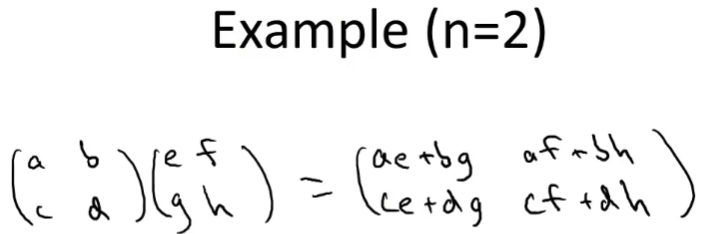


>*Divide and conquer*
>1. *Divide into smaller subproblem*
>2. *Conquer recursive calls*
>3. *Combine sub solutions into the original problem*

Idea:

We can divide the matrix into cuadrants so that the matrix remains squared $$\frac{n}{2} . \frac{n}{2} $$
Same applies to Y

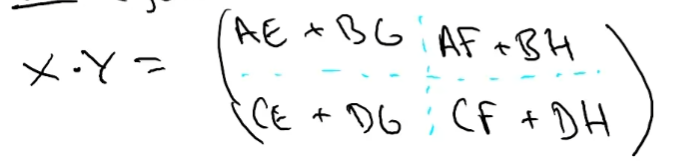

### Approach #1
1. Compute 8 necessary products
2. do the addition cuadrant
The issue with this approach is that the running time remains the same O(n**3)


### Strassen's algorithm
1. Recursively computes only 7 terms
2. Adds the necessary products

In [59]:
#Not using numpy would be a great disadvantage
import numpy as np

def split(matrix):
  row, col = matrix.shape
  row2,col2 = row//2, col//2
  return matrix[:row2, :col2], matrix[:row2, col2:], matrix[row2:, :col2], matrix[row2:, col2:]

def strassen(mx,my):

  #The base case is that our matrix is down to a scalar, then there is no matrix multiplication to do just x*y
  if len(mx) ==1:
    return mx*my

  #The matrix is n>1 then we can split it
  a, b, c, d = split(mx)
  e, f, g, h = split(my)


  p1 = strassen(a, f - h) 
  p2 = strassen(a + b, h)       
  p3 = strassen(c + d, e)       
  p4 = strassen(d, g - e)       
  p5 = strassen(a + d, e + h)       
  p6 = strassen(b - d, g + h) 
  p7 = strassen(a - c, e + f) 
  c11 = p5 + p4 - p2 + p6 
  c12 = p1 + p2          
  c21 = p3 + p4           
  c22 = p1 + p5 - p3 - p7 
  return np.vstack((np.hstack((c11, c12)), np.hstack((c21, c22))))

m4x = [[1,1,1,1]
     ,[2,2,2,2]
     ,[3,3,3,3]
     ,[2,2,2,2]]

m4y = [[1,1,1,1]
     ,[2,2,2,2]
     ,[3,3,3,3]
     ,[2,2,2,2]]

# print(strassen(mx,my))
print(strassen(np.matrix(m4x),np.matrix(m4y)))

[[ 8  8  8  8]
 [16 16 16 16]
 [24 24 24 24]
 [16 16 16 16]]
